# Problem 1.3

In [1]:
import numpy as np
from scipy.linalg import orth
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def main(k, n, num_point, var_noise):
    # Step 1: Generate a random k-dim subspace based on the orthogonal basis U
    original_space = np.random.random(size=(n, n))
    U_full = orth(original_space)
    indices = np.random.choice(np.arange(1000), size=k, replace=False)
    U = U_full[:, indices]

    # Step 2: Generate original x
    c = np.random.rand(k, num_point)
    x_original = np.matmul(U, c)

    # Step 3: Add Gaussian zero-mean noise to obtain noisy observations
    mean = np.zeros(n)
    cov = (var_noise / n) * np.identity(n)
    noise_all = np.zeros((n, num_point))
    for point in range(num_point):
        noise = np.random.multivariate_normal(mean, cov, 1)
        noise_all[:, point] = np.reshape(noise, n)
    y = x_original + noise_all

    # Step 4: Denoise and get the estimation
    x_estimate = np.matmul(np.matmul(U, U.T), y)

    # Step 5: Calculate the MSE
    diff = x_estimate - x_original
    square = np.square(diff)
    ssd = np.sum(np.square(diff), axis=0)
    norm = np.sum(np.square(x_original), axis=0)
    mse_avg = ssd / norm
    return mse_avg

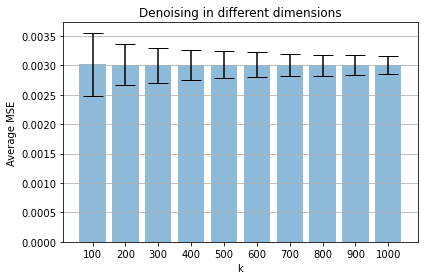

In [3]:
# Experiment 1: Dimension k ranging from 100 to 1000
k_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] # dim of the subspace
n = 1000 # dim of the original space
num_point = 500
variance_noise = 1

list_mse_mean = []
list_mse_std = []

for k in k_list:
    mse_avg = main(k, n, num_point, variance_noise)
    list_mse_mean.append(np.mean(mse_avg))
    list_mse_std.append(np.std(mse_avg))
    
# Plot
label_k = ['100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
x = np.arange(len(label_k))
fig, ax = plt.subplots()
ax.bar(x, list_mse_mean,
       yerr=list_mse_std,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average MSE')
ax.set_xticks(x)
ax.set_xticklabels(label_k)
ax.set_xlabel('k')
ax.set_title('Denoising in different dimensions')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()

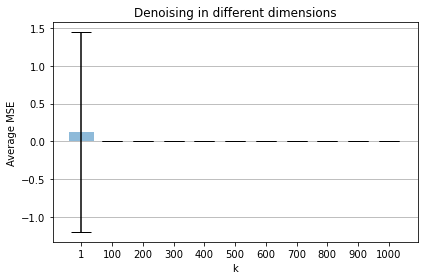

In [4]:
# Experiment 2: Dimension k ranging from 1 to 1000
k_list = [1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000] # dim of the subspace
n = 1000 # dim of the original space
num_point = 500
variance_noise = 1

list_mse_mean = []
list_mse_std = []

for k in k_list:
    mse_avg = main(k, n, num_point, variance_noise)
    list_mse_mean.append(np.mean(mse_avg))
    list_mse_std.append(np.std(mse_avg))
    
# Plot
label_k = ['1', '100', '200', '300', '400', '500', '600', '700', '800', '900', '1000']
x = np.arange(len(label_k))
fig, ax = plt.subplots()
ax.bar(x, list_mse_mean,
       yerr=list_mse_std,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average MSE')
ax.set_xticks(x)
ax.set_xticklabels(label_k)
ax.set_xlabel('k')
ax.set_title('Denoising in different dimensions')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()